In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
df = pd.read_csv('C:/Users/nirma/Desktop/PROJECT/Stock_Price_Prediction/SandP500.csv',parse_dates=['Date'],index_col='Date')

In [5]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-06-24,3911.74,--,3821.75,3913.65,3821.75
2022-06-23,3795.73,--,3774.71,3802.58,3743.52
2022-06-22,3759.89,--,3733.89,3801.79,3717.69
2022-06-21,3764.79,--,3715.31,3779.65,3715.31
2022-06-17,3674.84,--,3665.90,3707.71,3636.87


In [7]:
df1=df.reset_index()['Close/Last'] 

<AxesSubplot:xlabel='Date'>

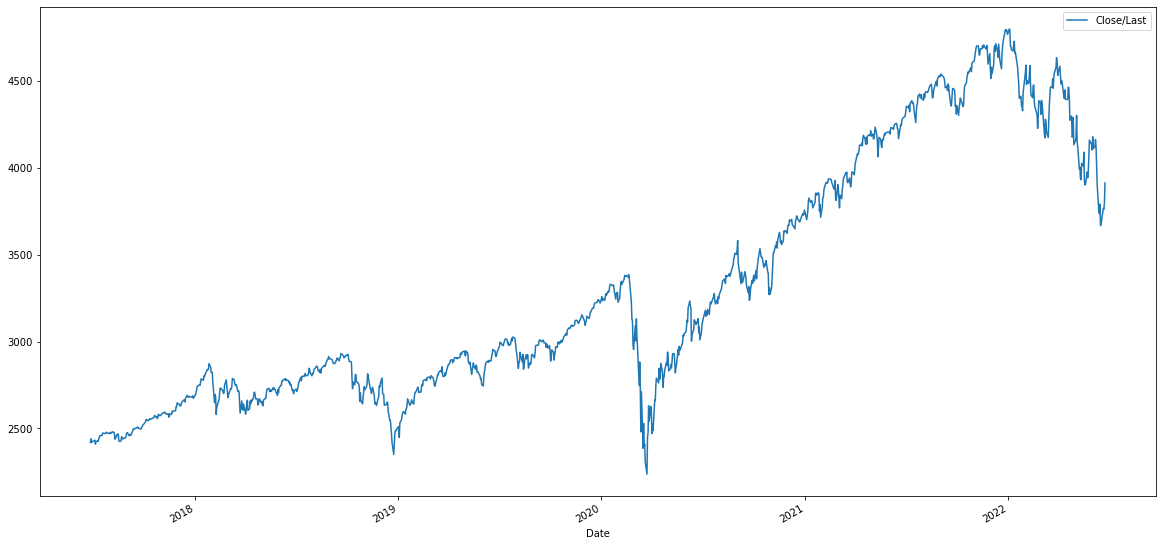

In [9]:
import matplotlib.pyplot as plt
df.reset_index().plot(x='Date',y='Close/Last',figsize=(20,10))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [11]:
print(df1)

[[0.65425374]
 [0.60892246]
 [0.59491786]
 ...
 [0.07123431]
 [0.07943622]
 [0.07110927]]


In [12]:
X=list()
y=list()

for index in range(10,len(df1),1):
    X.append(df1[index-10:index])
    y.append(df1[index])

In [16]:
X=np.array(X)
y=np.array(y)

for i,j in zip(X[:10],y[:10]):
    print("Input : ",i,' ----> Output :',j)

Input :  [[0.65425374]
 [0.60892246]
 [0.59491786]
 [0.59683255]
 [0.5616843 ]
 [0.55853092]
 [0.60667954]
 [0.58537958]
 [0.59090874]
 [0.65000234]]  ----> Output : [0.69570484]
Input :  [[0.60892246]
 [0.59491786]
 [0.59683255]
 [0.5616843 ]
 [0.55853092]
 [0.60667954]
 [0.58537958]
 [0.59090874]
 [0.65000234]
 [0.69570484]]  ----> Output : [0.73397912]
Input :  [[0.59491786]
 [0.59683255]
 [0.5616843 ]
 [0.55853092]
 [0.60667954]
 [0.58537958]
 [0.59090874]
 [0.65000234]
 [0.69570484]
 [0.73397912]]  ----> Output : [0.75152785]
Input :  [[0.59683255]
 [0.5616843 ]
 [0.55853092]
 [0.60667954]
 [0.58537958]
 [0.59090874]
 [0.65000234]
 [0.69570484]
 [0.73397912]
 [0.75152785]]  ----> Output : [0.73619078]
Input :  [[0.5616843 ]
 [0.55853092]
 [0.60667954]
 [0.58537958]
 [0.59090874]
 [0.65000234]
 [0.69570484]
 [0.73397912]
 [0.75152785]
 [0.73619078]]  ----> Output : [0.73115397]
Input :  [[0.55853092]
 [0.60667954]
 [0.58537958]
 [0.59090874]
 [0.65000234]
 [0.69570484]
 [0.73397912

In [17]:
X_train=X[:-5]
y_train=y[:-5]
X_test=X[-5:]
y_test=y[-5:]

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1243, 10, 1), (5, 10, 1), (1243, 1), (5, 1))

In [19]:
test_data=tf.data.Dataset.from_tensor_slices((X_test,y_test))


In [20]:
import tensorflow as tf
import keras as ks
from keras.layers import LSTM,Dense,Bidirectional

model=ks.models.Sequential()
model.add(Bidirectional(LSTM(units=10,input_shape=(10,1),activation='relu')))

#model.add(LSTM(units=5,input_shape=(10,1),activation='relu',return_sequences=True))

#model.add(LSTM(units=5,input_shape=(10,1),activation='relu',return_sequences=True))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [21]:
model.fit(X_train,y_train,epochs=50,batch_size=10,validation_data=test_data)


Epoch 1/50
125/125 [==============================] - 14s 85ms/step - loss: 0.1773 - mse: 0.1773 - val_loss: 2.2590e-04 - val_mse: 2.2590e-04
Epoch 2/50
125/125 [==============================] - 10s 83ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 1.0623e-05 - val_mse: 1.0623e-05
Epoch 3/50
125/125 [==============================] - 11s 84ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.0188e-05 - val_mse: 1.0188e-05
Epoch 4/50
125/125 [==============================] - 10s 83ms/step - loss: 9.9603e-04 - mse: 9.9603e-04 - val_loss: 1.3260e-05 - val_mse: 1.3260e-05
Epoch 5/50
125/125 [==============================] - 10s 83ms/step - loss: 9.0028e-04 - mse: 9.0028e-04 - val_loss: 1.6267e-05 - val_mse: 1.6267e-05
Epoch 6/50
125/125 [==============================] - 10s 83ms/step - loss: 8.3519e-04 - mse: 8.3519e-04 - val_loss: 2.3632e-05 - val_mse: 2.3632e-05
Epoch 7/50
125/125 [==============================] - 10s 83ms/step - loss: 8.1987e-04 - mse: 8.1987e-04 - val_loss: 2.3890e

In [15]:
preds=model.predict(X_test)


In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler().fit(df1.reshape(-1,1))

In [17]:
preds=min_max.inverse_transform(preds)


In [18]:
100-np.mean((abs(y_test-preds)/y_test)*100)

92.29475050222078

In [19]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

In [20]:
mse = mean_squared_error(y_test,preds)
print(mse)
r2=r2_score(y_test,preds)
print(r2)
print(mean_absolute_error(y_test,preds))

0.0019572432581072214
-3.220537836985452
0.04029253067883178


In [21]:
y_test_plot=min_max.inverse_transform(y_test)
preds=min_max.inverse_transform(preds)

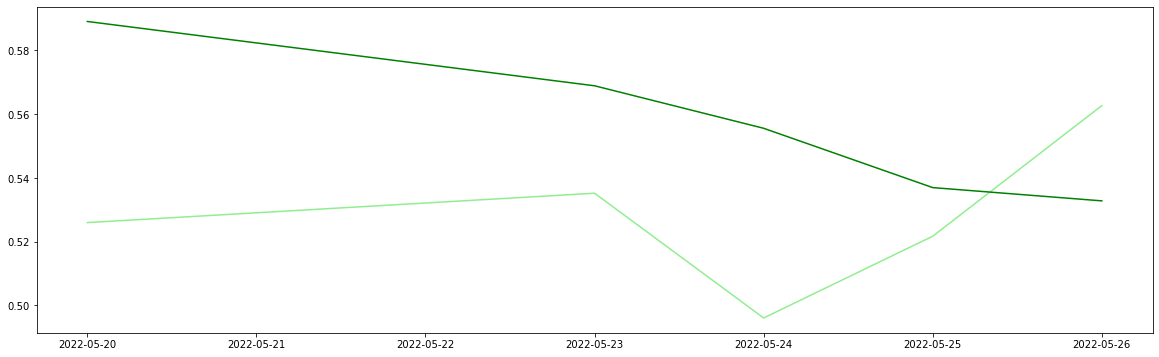

In [22]:
plt.plot(df.index[-5:],y_test_plot,color='lightgreen')
plt.plot(df.index[-5:],preds,color='green')
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

In [23]:
full_origional=min_max.inverse_transform(y)
full_preds=min_max.inverse_transform(model.predict(X))
preds=tf.convert_to_tensor(full_preds)

In [24]:
full_origional=full_origional.reshape((full_origional.shape[0]))
full_preds=full_preds.reshape((preds.shape[0]))

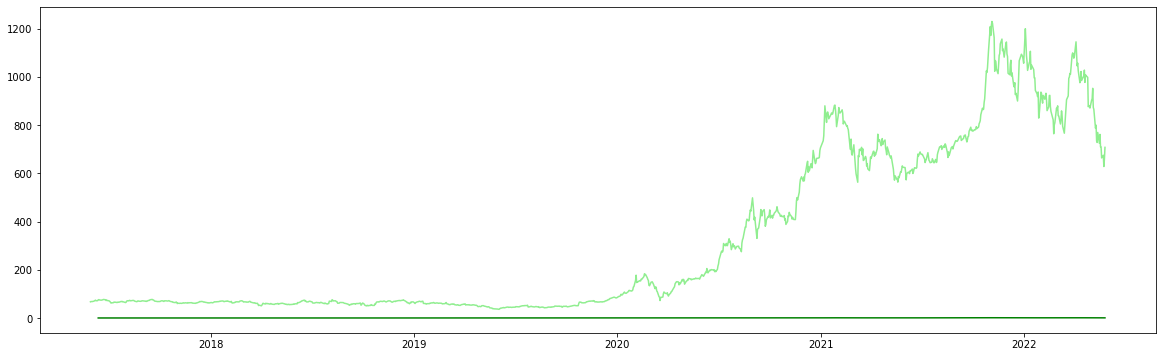

In [25]:
plt.plot(df.index,df.Close,color='lightgreen')
plt.plot(df.index[10:],full_preds,color='green')

fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()


In [26]:
model = ks.models.Sequential()

model.add(Bidirectional(LSTM(units=50, return_sequences=True, 
                             input_shape=(X_train.shape[1], 1))))

model.add(LSTM(units= 50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(units= 50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(LSTM(units= 50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])

In [ ]:
model.fit(X_train, y_train,epochs=50  )

In [ ]:
prediction = model.predict(X_test)
look_back=0

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(prediction)+look_back, :] = prediction
#shift test predictions for plotting
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color='red')
plt.plot(testPredictPlot)
plt.legend(['Actual','Train','Test'])
plt.show()

In [ ]:
plt.plot(X_test.reshape(-1,1),linewidth=1)
plt.title('Actual test dataset')

plt.show()